# Reference

https://databricks.com/blog/2015/08/12/from-pandas-to-apache-sparks-dataframe.html

https://pandas.pydata.org/pandas-docs/stable/10min.html

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append("..")

## Install Optimus 

from command line:

`pip install optimuspyspark`

from a notebook you can use:

`!pip install optimuspyspark`

## Import optimus and start it

In [ ]:
from optimus import Optimus
op= Optimus(master="local", verbose=True)

## Dataframe creation

Create a dataframe to passing a list of values for columns and rows. Unlike pandas you need to specify the column names.


* https://en.wikipedia.org/wiki/Optimus_Prime
* https://en.wikipedia.org/wiki/Bumblebee_(Transformers)
* https://en.wikipedia.org/wiki/Ironhide
* https://en.wikipedia.org/wiki/Jazz_(Transformers)
* https://en.wikipedia.org/wiki/Megatron

In [ ]:
df = op.create.df(
    [
        "names",
        "height(ft)",
        "function",
        "rank",
        "weight(t)",
        "japanese name",
        "last position",
        "attributes"
    ],
    [
        
        ("Optim'us", 28.0, "Leader", 10, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111",[8.5344, 4300]),
        ("bumbl#ebéé  ", 17.5, "Espionage", 7, 2, ["Bumble","Goldback"], "10.642707,-71.612534",[5.334, 2000]),
        ("ironhide&", 26.0, "Security", 7, 4, ["Roadbuster"], "37.789563,-122.400356",[7.9248, 4000]),
        ("Jazz",13.0, "First Lieutenant", 8, 1.8, ["Meister"], "33.670666,-117.841553",[3.9624, 1800]),
        ("Megatron",None, "None", None, 5.7, ["Megatron"], None,[None,5700]),
        ("Metroplex_)^$",300 , "Battle Station", 8, None, ["Metroflex"],None,[91.44, None]),
        
    ]).h_repartition(1)
df.table()

Creating a dataframe by passing a list of tuples specifyng the column data type. You can specify as data type an string or a Spark Datatypes. https://spark.apache.org/docs/2.3.1/api/java/org/apache/spark/sql/types/package-summary.html

Also you can use some Optimus predefined types:
* "str" = StringType() 
* "int" = IntegerType() 
* "float" = FloatType()
* "bool" = BoleanType()

In [10]:
df = op.create.df(
    [
        ("names", "str"),
        ("height", "float"),
        ("function", "str"),
        ("rank", "int"),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7
Jazz,13.0,First⸱Lieutenant,8
Megatron,None,None,None


Creating a dataframe and specify if the column accepts null values

In [78]:
df = op.create.df(
    [
        ("names", "str", True),
        ("height", "float", True),
        ("function", "str", True),
        ("rank", "int", True),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7
Jazz,13.0,First⸱Lieutenant,8
Megatron,None,None,None


Creating a Daframe using a pandas dataframe

In [35]:
import pandas as pd
import numpy as np

data = [("bumbl#ebéé  ", 17.5, "Espionage", 7),
         ("Optim'us", 28.0, "Leader", 10),
         ("ironhide&", 26.0, "Security", 7)]
labels = ["names", "height", "function", "rank"]

# Create pandas dataframe
pdf = pd.DataFrame.from_records(data, columns=labels)

df = op.create.df(pdf = pdf)
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


## Viewing data
Here is how to View the first 10 elements in a dataframe.

In [9]:
df.table(10)

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]"
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]"
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]"
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]"
Megatron,None,None,None,5.7,[Megatron],None,"[null,⸱5700]"
Metroplex_)^$,300,Battle⸱Station,8,None,[Metroflex],None,"[91.44,⸱null]"


## Partitions
Partition are the way Spark divide the data in your local computer or cluster to better optimize how it will be processed.It can greatly impact the Spark performance.

Take 5 minutes to read this article:
https://www.dezyre.com/article/how-data-partitioning-in-spark-helps-achieve-more-parallelism/297

## Lazy operations
Lorem ipsum 

https://stackoverflow.com/questions/38027877/spark-transformation-why-its-lazy-and-what-is-the-advantage

## Inmutability
Lorem ipsum

## Spark Architecture
Lorem ipsum

## Columns and Rows

Optimus organized operations in columns and rows. This is a little different of how pandas works in which all operations are aroud the pandas class. We think this approach can better help you to access and transform data. For a deep dive about the designing decision please read:

https://towardsdatascience.com/announcing-optimus-v2-agile-data-science-workflows-made-easy-c127a12d9e13

Sort by cols names

In [28]:
df.cols.sort().table()

attributes 1 (string) nullable,function 2 (string) nullable,height(ft) 3 (string) nullable,japanese name 4 (string) nullable,last position 5 (string) nullable,names 6 (string) nullable,rank 7 (string) nullable,weight(t) 8 (string) nullable
"[8.5344,⸱4300]",Leader,28.0,"[Inochi,⸱Convoy]","19.442735,-99.201111",Optim'us,10,4.3
"[5.334,⸱2000]",Espionage,17.5,"[Bumble,⸱Goldback]","10.642707,-71.612534",bumbl#ebéé⸱⸱,7,2
"[7.9248,⸱4000]",Security,26.0,[Roadbuster],"37.789563,-122.400356",ironhide&,7,4
"[3.9624,⸱1800]",First⸱Lieutenant,13.0,[Meister],"33.670666,-117.841553",Jazz,8,1.8
"[null,⸱5700]",None,None,[Megatron],None,Megatron,None,5.7
"[91.44,⸱null]",Battle⸱Station,300,[Metroflex],None,Metroplex_)^$,8,None


Sort by rows rank value

In [29]:
df.rows.sort("rank").table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable
Metroplex_)^$,300,Battle⸱Station,8,None,[Metroflex],None,"[91.44,⸱null]"
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]"
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]"
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]"
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]"
Megatron,None,None,None,5.7,[Megatron],None,"[null,⸱5700]"


In [30]:
df.describe().table()

summary 1 (string) nullable,names 2 (string) nullable,height(ft) 3 (string) nullable,function 4 (string) nullable,rank 5 (string) nullable,weight(t) 6 (string) nullable,japanese name 7 (string) nullable,last position 8 (string) nullable,attributes 9 (string) nullable
count,6,5,6,5,5,6,4,6
mean,None,76.9,None,8.0,3.56,None,None,None
stddev,None,124.86712938159505,None,1.224744871391589,1.6471186963907611,None,None,None
min,Jazz,13.0,Battle⸱Station,10,1.8,"[Bumble,⸱Goldback]","10.642707,-71.612534","[3.9624,⸱1800]"
max,ironhide&,300,Security,8,5.7,[Roadbuster],"37.789563,-122.400356","[null,⸱5700]"


## Selection

Unlike Pandas, Spark DataFrames don't support random row access. So methods like `loc` in pandas are not available.

Also Pandas don't handle indexes. So methods like `iloc` are not available.

Select an show an specific column

In [31]:
df.cols.select("names").table()

names 1 (string) nullable
Optim'us
bumbl#ebéé⸱⸱
ironhide&
Jazz
Megatron
Metroplex_)^$


Select rows from a Dataframe where a the condition is meet

In [32]:
df.rows.select(df["rank"]>7).table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]"
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]"
Metroplex_)^$,300,Battle⸱Station,8,None,[Metroflex],None,"[91.44,⸱null]"


Select rows by specific values on it

In [33]:
df.rows.is_in("rank",[7, 10]).table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]"
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]"
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]"


Create and unique id for every row.

In [34]:
df.create_id().table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable,id 9 (bigint)
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]",0
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]",1
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]",2
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]",3
Megatron,None,None,None,5.7,[Megatron],None,"[null,⸱5700]",4
Metroplex_)^$,300,Battle⸱Station,8,None,[Metroflex],None,"[91.44,⸱null]",5


Create wew columns

In [35]:
df.cols.append("Affiliation","Autobot").table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable,Affiliation 9 (string)
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]",Autobot
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]",Autobot
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]",Autobot
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]",Autobot
Megatron,None,None,None,5.7,[Megatron],None,"[null,⸱5700]",Autobot
Metroplex_)^$,300,Battle⸱Station,8,None,[Metroflex],None,"[91.44,⸱null]",Autobot


## Missing Data

In [36]:
df.rows.drop_na("*",how='any').table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]"
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]"
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]"
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]"


Filling missing data.

In [37]:
df.cols.fill_na("*","N//A").table()

names 1 (string) nullable,height(ft) 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable,weight(t) 5 (string) nullable,japanese name 6 (string) nullable,last position 7 (string) nullable,attributes 8 (string) nullable
Optim'us,28.0,Leader,10,4.3,"[Inochi,⸱Convoy]","19.442735,-99.201111","[8.5344,⸱4300]"
bumbl#ebéé⸱⸱,17.5,Espionage,7,2,"[Bumble,⸱Goldback]","10.642707,-71.612534","[5.334,⸱2000]"
ironhide&,26.0,Security,7,4,[Roadbuster],"37.789563,-122.400356","[7.9248,⸱4000]"
Jazz,13.0,First⸱Lieutenant,8,1.8,[Meister],"33.670666,-117.841553","[3.9624,⸱1800]"
Megatron,N//A,None,N//A,5.7,[Megatron],N//A,"[null,⸱5700]"
Metroplex_)^$,300,Battle⸱Station,8,N//A,[Metroflex],N//A,"[91.44,⸱null]"


To get the boolean mask where values are nan.

In [38]:
df.cols.is_na("*").table()

names 1 (boolean),height(ft) 2 (boolean),function 3 (boolean),rank 4 (boolean),weight(t) 5 (boolean),japanese name 6 (boolean),last position 7 (boolean),attributes 8 (boolean)
False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False
False,True,False,True,False,False,True,False
False,False,False,False,True,False,True,False


# Operations

## Stats

In [39]:
df.cols.mean("height(ft)")

76.9

In [40]:
df.cols.mean("*")

{'names': {'mean': None},
 'height(ft)': {'mean': 76.9},
 'function': {'mean': None},
 'rank': {'mean': 8.0},
 'weight(t)': {'mean': 3.56},
 'japanese name': {'mean': None},
 'last position': {'mean': None},
 'attributes': {'mean': None}}

### Apply

In [42]:
def func(value, args):
    return value + 1

df.cols.apply("height(ft)",func,"float").table()

Py4JJavaError: An error occurred while calling o1132.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 135.0 failed 1 times, most recent failure: Lost task 0.0 in stage 135.0 (TID 141, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 230, in main
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 225, in process
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 260, in dump_stream
    for series in iterator:
  File "<string>", line 1, in <lambda>
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 91, in <lambda>
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 82, in verify_result_length
  File "C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\pyspark\util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "..\optimus\functions.py", line 69, in to_serie
    return apply_to_series(value, attr)
  File "..\optimus\functions.py", line 66, in apply_to_series
    return val.apply(func, args=attr)
  File "C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py", line 3192, in apply
    mapped = lib.map_infer(values, f, convert=convert_dtype)
  File "pandas/_libs/src\inference.pyx", line 1472, in pandas._libs.lib.map_infer
  File "C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py", line 3179, in <lambda>
    f = lambda x: func(x, *args, **kwds)
  File "<ipython-input-42-0f8ca5750457>", line 2, in func
TypeError: must be str, not int

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:298)
	at org.apache.spark.sql.execution.python.ArrowPythonRunner$$anon$1.read(ArrowPythonRunner.scala:171)
	at org.apache.spark.sql.execution.python.ArrowPythonRunner$$anon$1.read(ArrowPythonRunner.scala:121)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:252)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.sql.execution.python.ArrowEvalPythonExec$$anon$2.<init>(ArrowEvalPythonExec.scala:90)
	at org.apache.spark.sql.execution.python.ArrowEvalPythonExec.evaluate(ArrowEvalPythonExec.scala:88)
	at org.apache.spark.sql.execution.python.EvalPythonExec$$anonfun$doExecute$1.apply(EvalPythonExec.scala:131)
	at org.apache.spark.sql.execution.python.EvalPythonExec$$anonfun$doExecute$1.apply(EvalPythonExec.scala:93)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$23.apply(RDD.scala:800)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$23.apply(RDD.scala:800)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:363)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3195)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3192)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3254)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3253)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3192)
	at sun.reflect.GeneratedMethodAccessor92.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 230, in main
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 225, in process
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 260, in dump_stream
    for series in iterator:
  File "<string>", line 1, in <lambda>
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 91, in <lambda>
  File "C:\opt\spark\spark-2.3.1-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 82, in verify_result_length
  File "C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\pyspark\util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "..\optimus\functions.py", line 69, in to_serie
    return apply_to_series(value, attr)
  File "..\optimus\functions.py", line 66, in apply_to_series
    return val.apply(func, args=attr)
  File "C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py", line 3192, in apply
    mapped = lib.map_infer(values, f, convert=convert_dtype)
  File "pandas/_libs/src\inference.pyx", line 1472, in pandas._libs.lib.map_infer
  File "C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py", line 3179, in <lambda>
    f = lambda x: func(x, *args, **kwds)
  File "<ipython-input-42-0f8ca5750457>", line 2, in func
TypeError: must be str, not int

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:298)
	at org.apache.spark.sql.execution.python.ArrowPythonRunner$$anon$1.read(ArrowPythonRunner.scala:171)
	at org.apache.spark.sql.execution.python.ArrowPythonRunner$$anon$1.read(ArrowPythonRunner.scala:121)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:252)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at org.apache.spark.sql.execution.python.ArrowEvalPythonExec$$anon$2.<init>(ArrowEvalPythonExec.scala:90)
	at org.apache.spark.sql.execution.python.ArrowEvalPythonExec.evaluate(ArrowEvalPythonExec.scala:88)
	at org.apache.spark.sql.execution.python.EvalPythonExec$$anonfun$doExecute$1.apply(EvalPythonExec.scala:131)
	at org.apache.spark.sql.execution.python.EvalPythonExec$$anonfun$doExecute$1.apply(EvalPythonExec.scala:93)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$23.apply(RDD.scala:800)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitions$1$$anonfun$apply$23.apply(RDD.scala:800)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


### Histogramming

In [ ]:
df.cols.count_uniques("*")

### String Methods

In [ ]:
df\
    .cols.lower("names")\
    .cols.upper("function").table()

## Merge

### Concat

Optimus provides and intuitive way to concat Dataframes by columns or rows.

In [ ]:
df_new = op.create.df(
    [
        "class"
    ],
    [
        ("Autobot"),
        ("Autobot"),
        ("Autobot"),
        ("Autobot"),
        ("Decepticons"),
        
        
    ]).h_repartition(1)

op.concat([df,df_new], "columns").table()

In [ ]:
df_new = op.create.df(
    [
        "names",
        "height",
        "function",
        "rank",
    ],
    [
        ("Grimlock", 22.9, "Dinobot Commander", 9),               
    ]).h_repartition(1)

op.concat([df,df_new], "rows").table()


In [ ]:
Operations like `join` and `group` are handle using Spark directly

In [ ]:
import pandas as pd

pdf = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

sdf = op.create.df(pdf=pdf)
sdf.table()
sdf.melt(id_vars=['A'], value_vars=['B', 'C']).table()

In [ ]:
pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                            'B': {0: 1, 1: 3, 2: 5},
                            'C': {0: 2, 1: 4, 2: 6}})

In [24]:
df = op.create.df(
   [("A","str"), ("B","int"), ("C","int")],
[
    ("a",1,2),
    ("b",3,4),
    ("c",5,6),        
])
df.melt(id_vars=['A'], value_vars=['B', 'C']).table()

[[('A', StringType, True), ('B', StringType, True), ('C', StringType, True)],
 [('a', '1', '2'), ('b', '3', '4'), ('c', '5', '6')]]

A 1 (string) nullable,variable 2 (string),value 3 (string) nullable
a,B,1
a,C,2
b,B,3
b,C,4
c,B,5
c,C,6


NameError: name 'StringType' is not defined

In [44]:
a = [("A","str"), ("B","int"), ("C","int")],
[
    ("a",1,2),
    ("b",3,4),
    ("c",5,6),        
]

[('a', 1, 2), ('b', 3, 4), ('c', 5, 6)]

In [142]:
#df.to_json()
df.table()

A 1 (string) nullable,B 2 (string) nullable,C 3 (string) nullable
a,1,2
b,3,4
c,5,6


In [140]:
value = df.collect()
[tuple(v.asDict().values()) for v in value]


[('a', '1', '2'), ('b', '3', '4'), ('c', '5', '6')]

In [8]:
df.cols.names()

AttributeError: 'function' object has no attribute 'names'

In [12]:
df.export()

'[(\'names\', StringType(), True),(\'height(ft)\', ShortType(), True),(\'function\', StringType(), True),(\'rank\', ByteType(), True),(\'age\', IntegerType(), True),(\'weight(t)\', FloatType(), True),(\'japanese name\', StringType(), True),(\'last position seen\', StringType(), True),(\'date arrival\', StringType(), True),(\'last date seen\', StringType(), True),(\'attributes\', ArrayType(FloatType(),True), True),(\'DateType\', DateType(), True),(\'Tiemstamp\', TimestampType(), True),(\'Cybertronian\', BooleanType(), True),(\'function(binary)\', BinaryType(), True),(\'NullType\', NullType(), True)], [("Optim\'us", 28, \'Leader\', 10, 5000000, 4.300000190734863, \'[Inochi, Convoy]\', \'19.442735,-99.201111\', \'1980/04/10\', \'2016/09/10\', [8.53439998626709, 4300.0], datetime.date(2016, 9, 10), datetime.datetime(2014, 6, 24, 0, 0), True, bytearray(b\'Leader\'), None), (\'bumbl#ebéé  \', 17, \'Espionage\', 7, 5000000, 2.0, \'[Bumble, Goldback]\', \'10.642707,-71.612534\', \'1980/04/10\'

In [22]:
source_df = op.create.df(
    ["A", "B", "C"],
    [
        ("a", 1, 2),
        ("b", 3, 4),
        ("c", 5, 6),
    ])


actual_df = source_df.melt(id_vars=['A'], value_vars=['B', 'C']).table()

expected_df = op.create.df([('A', StringType, True), ('B', StringType, True), ('C', StringType, True)],
                           [('a', '1', '2'), ('b', '3', '4'), ('c', '5', '6')])

assert (expected_df.collect() == actual_df.collect())

A 1 (string) nullable,variable 2 (string),value 3 (string) nullable
a,B,1
a,C,2
b,B,3
b,C,4
c,B,5
c,C,6


NameError: name 'StringType' is not defined

In [20]:
df.schema

StructType(List(StructField(A,StringType,true),StructField(B,StringType,true),StructField(C,StringType,true)))

In [24]:
eval("StringType()")

NameError: name 'StringType' is not defined

Processing column 'names'...
_count_data_types() executed in 1.89 sec
Processing column 'height(ft)'...
_count_data_types() executed in 1.89 sec
Processing column 'function'...
_count_data_types() executed in 1.92 sec
Processing column 'rank'...
_count_data_types() executed in 1.92 sec
Processing column 'weight(t)'...
_count_data_types() executed in 1.87 sec
Processing column 'japanese name'...
_count_data_types() executed in 1.95 sec
Processing column 'last position'...
_count_data_types() executed in 1.99 sec
Processing column 'attributes'...
_count_data_types() executed in 1.89 sec
count_data_types() executed in 15.33 sec
cast_columns() executed in 0.06 sec
_exprs() executed in 1.51 sec
general_stats() executed in 1.52 sec
------------------------------
Processing column 'names'...
frequency() executed in 1.22 sec
stats_by_column() executed in 0.0 sec
bucketizer() executed in 0.11 sec
hist() executed in 1.32 sec
hist_string() executed in 3.45 sec
------------------------------
Proce

Number of columns,8
Number of rows,6
Total Missing (%),0.83%
Total size in memory,82.7 MB
String,8
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,5

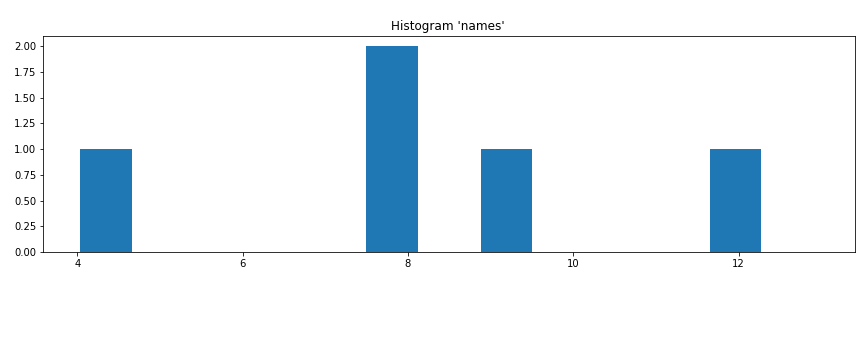
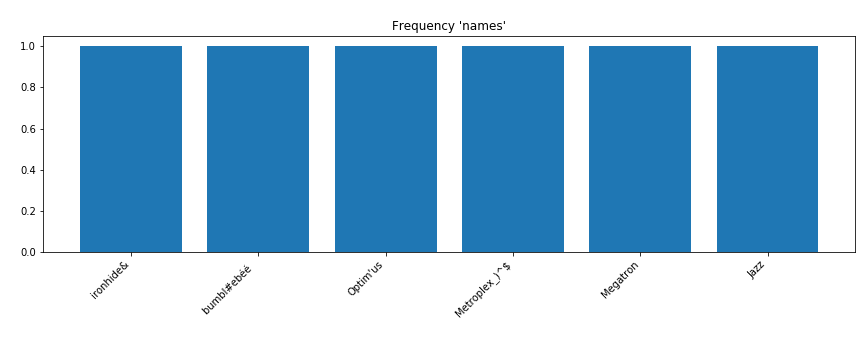
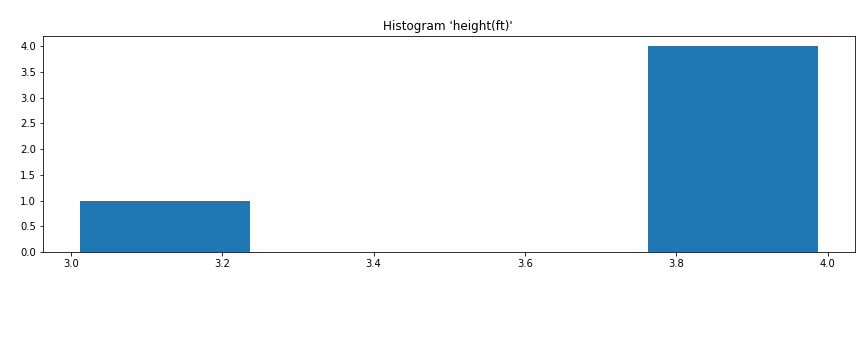
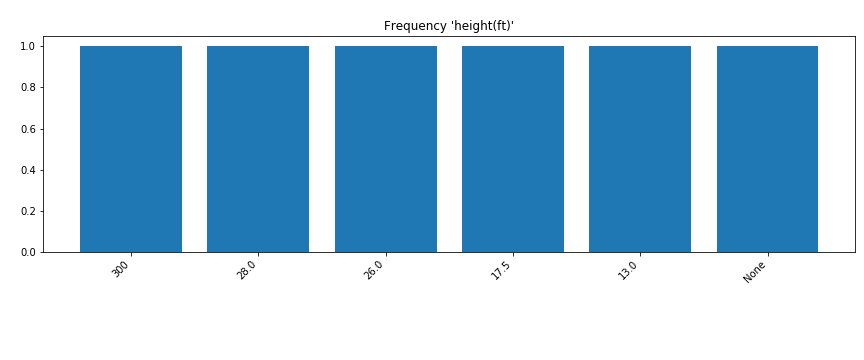
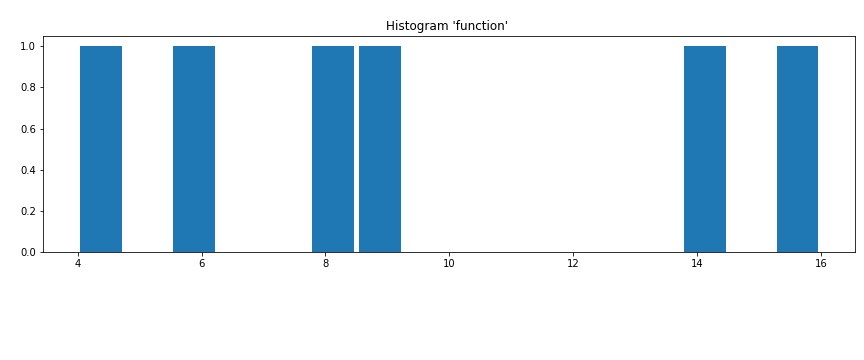
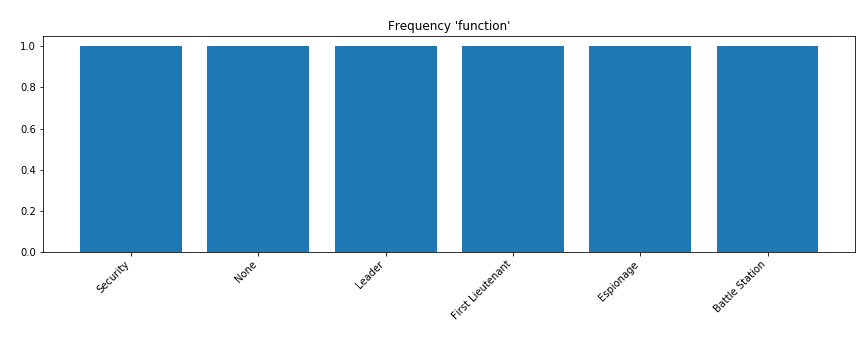
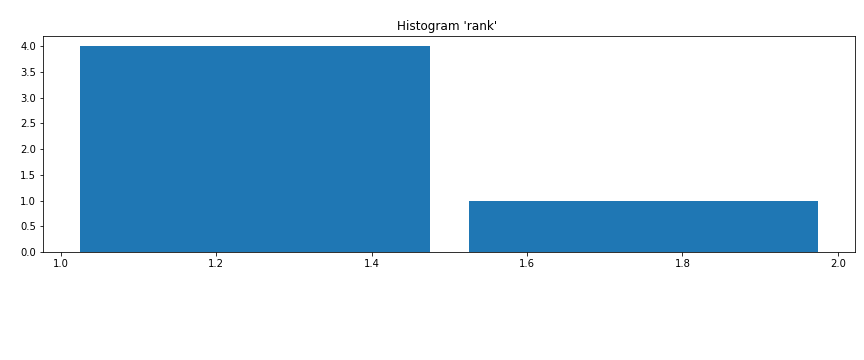
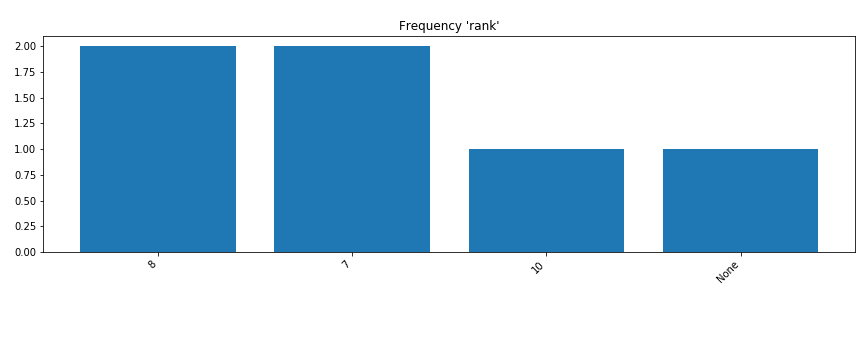
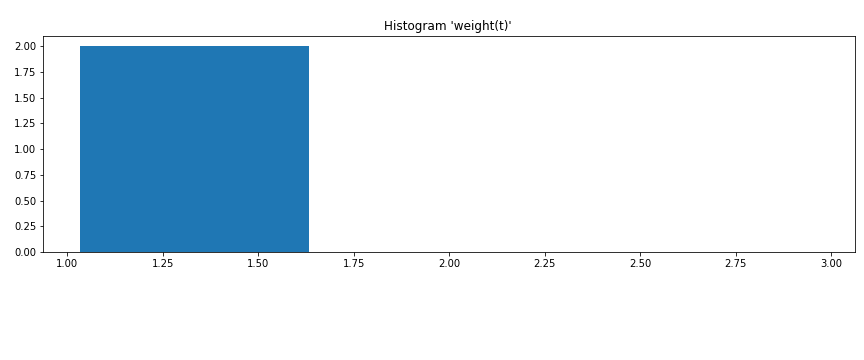
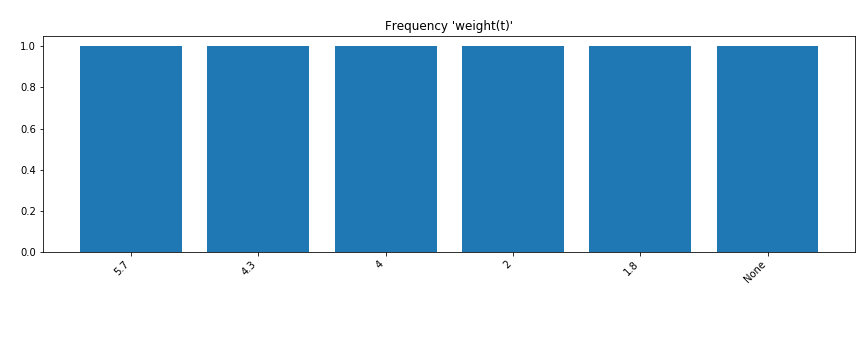
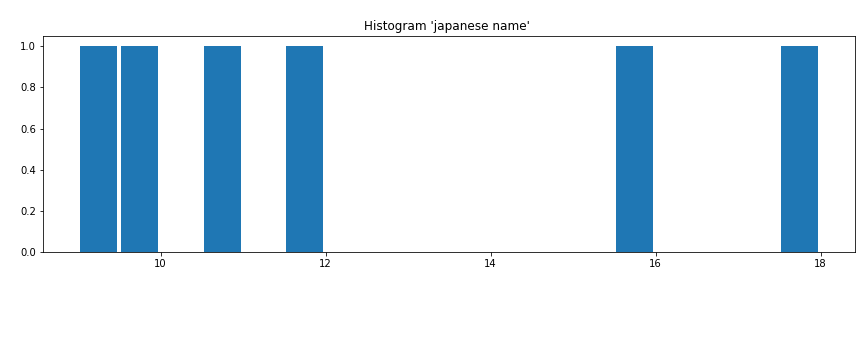
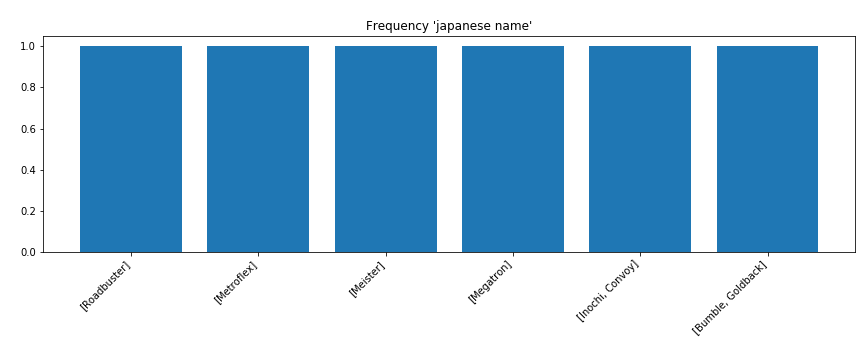
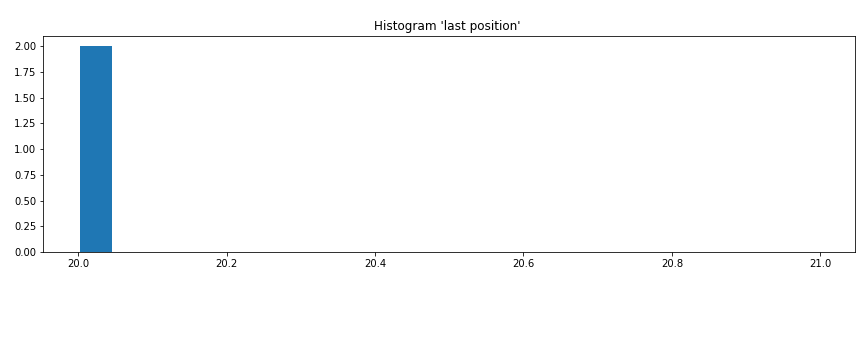
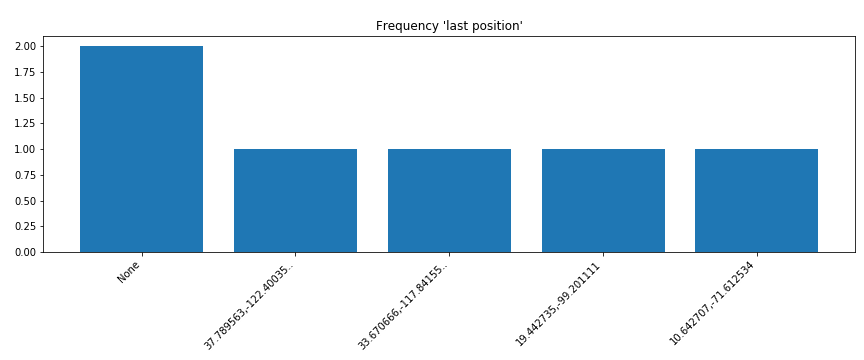
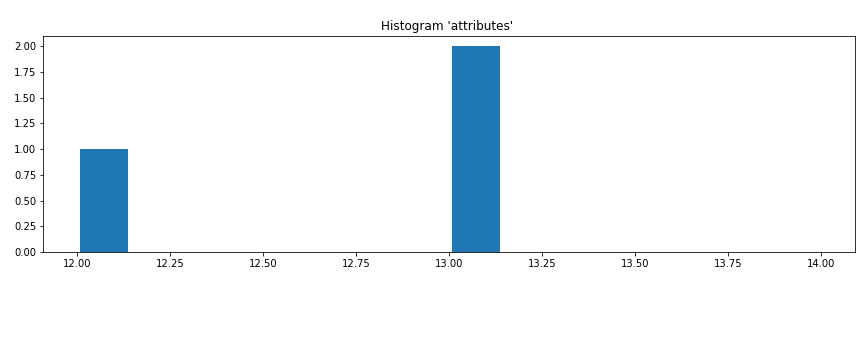
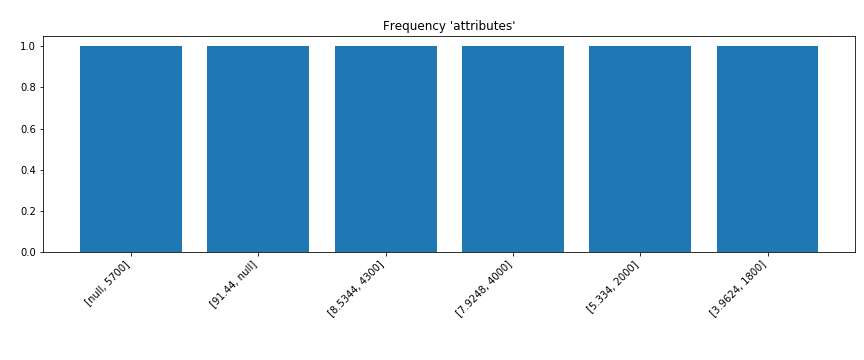

run() executed in 61.37 sec


In [14]:
op.profiler.run(df, "*",infer=False)